## WALMART CASE STUDY - CI AND CLT

### About Walmart

Walmart is an American multinational retail corporation that operates a chain of hypermarkets (also called supercenters),  discount department stores, and grocery stores from the United States

### Business Problem

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? 

### Data Dictionary

User_ID:	User ID  
Product_ID:	Product ID  
Gender:	Sex of User  
Age:	Age in bins  
Occupation:	Occupation(Masked)  
City_Category:	Category of the City (A,B,C)  
StayInCurrentCityYears:	Number of years stay in current city  
Marital_Status:	Marital Status  
ProductCategory:	Product Category (Masked)  
Purchase:	Purchase Amount  

#### Overview

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
raw_df=pd.read_csv('walmart_data.csv')
raw_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [4]:
raw_df.shape ##5L records

(550068, 10)

In [5]:
raw_df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [6]:
raw_df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [7]:
for col in ['User_ID','Occupation','Marital_Status','Product_Category']:
    raw_df[col]=raw_df[col].astype(str)

In [8]:
raw_df.dtypes

User_ID                       object
Product_ID                    object
Gender                        object
Age                           object
Occupation                    object
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                object
Product_Category              object
Purchase                       int64
dtype: object

In [9]:
raw_df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,550068,550068,550068,550068,550068,550068,550068,550068,550068,550068.000000
unique,5891,3631,2,7,21,3,5,2,20,NaN
top,1001680,P00265242,M,26-35,4,B,1,0,5,NaN
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9263.968713
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5023.065394
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5823.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8047.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12054.000000


In [10]:
raw_df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [11]:
raw_df.isnull().sum()/len(raw_df)*100

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category              0.0
Purchase                      0.0
dtype: float64

In [12]:
raw_df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

#### Observations-  
1. No missing values
2. Purchase amount mean and median is not close enough and std deviation is very high, which means there will be outliers
3. Top product ID bought is 'P00265242'
4. Top product category bought is 5
5. Out of 550068 data points, 414259 transactions(75%) are made by Male
6. Most customers are in the age bracket of 26-35 and most are unmarried
7. The most frequent buyer/customer is with user id- 1001680
8. Out of the 10 columns, 9 of them are categorical- ['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category'] and 'Purchase' is numeric/quantitative col

In [13]:
# Checking how categorical variables contributes to the entire data
categ_cols = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']
raw_df[categ_cols].melt().groupby(['variable', 'value'])[['value']].count()/len(raw_df)

value
variable                   value          
Age                        0-17   0.027455
                           18-25  0.181178
                           26-35  0.399200
                           36-45  0.199999
                           46-50  0.083082
                           51-55  0.069993
                           55+    0.039093
City_Category              A      0.268549
                           B      0.420263
                           C      0.311189
Gender                     F      0.246895
                           M      0.753105
Marital_Status             0      0.590347
                           1      0.409653
Stay_In_Current_City_Years 0      0.135252
                           1      0.352358
                           2      0.185137
                           3      0.173224
                           4+     0.154028

### Purchase outlier check

<AxesSubplot:xlabel='Purchase'>

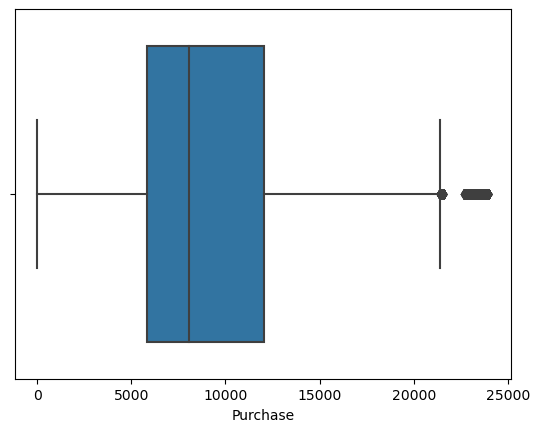

In [14]:
sns.boxplot(data=raw_df,x='Purchase')

#### Observation-
- We see 75% of data is below the Purchase amount of 12K

### Gender distribution

In [15]:
userid_nodups=raw_df.drop_duplicates(['User_ID'])
userid_grp=userid_nodups.groupby(['Gender'],as_index=False)['User_ID'].count()
userid_grp

,Gender,User_ID
0,F,1666
1,M,4225


<AxesSubplot:xlabel='Gender', ylabel='count'>

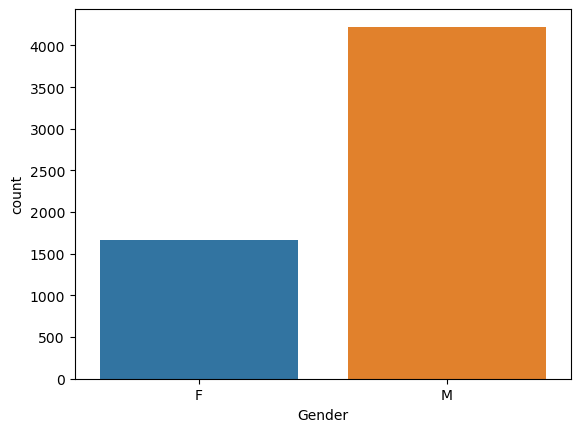

In [16]:
sns.countplot(data=userid_nodups, x='Gender')

In [17]:
userid_nodups['City_Category'].value_counts()/len(userid_nodups)

C    0.532847
B    0.289764
A    0.177389
Name: City_Category, dtype: float64

In [18]:
raw_df['City_Category'].value_counts()/len(raw_df)

B    0.420263
C    0.311189
A    0.268549
Name: City_Category, dtype: float64

In [19]:
#Checking the age group distribution in city categories
pd.crosstab(index=raw_df["City_Category"],columns=raw_df["Age"],margins=True,normalize="index")

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
City_Category,,,,,,,
A,0.017222,0.186400,0.499222,0.180185,0.051496,0.041288,0.024188
B,0.023511,0.187076,0.396171,0.205898,0.088272,0.076743,0.022330
C,0.041612,0.168705,0.316974,0.209131,0.103333,0.085649,0.074596
All,0.027455,0.181178,0.399200,0.199999,0.083082,0.069993,0.039093


#### Observation -
1. Though City category 'C' has highest number of customers(53%) living there, while purchase history shows many live in city 'B','C'  
. The reason could be that many in the age group of 26-35 purchase a lot who in turn are living in B, C city categories

#### Top 10 customers based on number of purchase and amount purchased

In [20]:
top10_customers_by_purchaseamt=raw_df.groupby(['User_ID']).sum().reset_index().sort_values(['Purchase'],ascending=False).head(10)
top10_customers_by_purchaseamt

,User_ID,Purchase
4166,1004277,10536909
1634,1001680,8699596
2831,1002909,7577756
1885,1001941,6817493
416,1000424,6573609
4335,1004448,6566245
5683,1005831,6512433
981,1001015,6511314
3297,1003391,6477160
1142,1001181,6387961


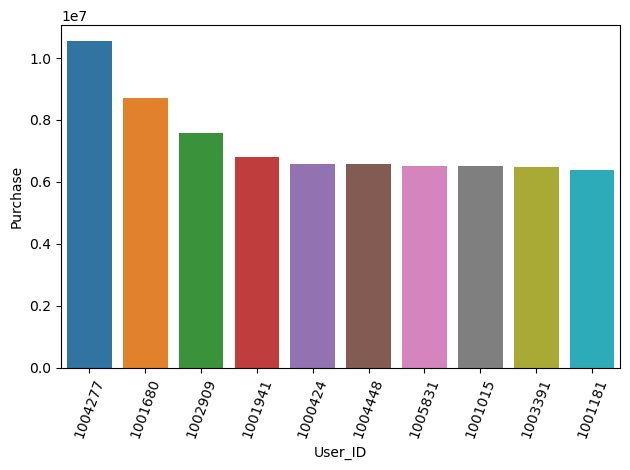

In [21]:
sns.barplot(data=top10_customers_by_purchaseamt, x='User_ID',y='Purchase')
plt.xticks(rotation=70)
plt.tight_layout()

In [22]:
top10_customers_by_numoforders=raw_df.groupby(['User_ID'],as_index=False)['Product_ID'].count().rename(columns={'Product_ID':
                                                                                              'num_of_orders'})
top10_customers_by_numoforders=top10_customers_by_numoforders.sort_values(['num_of_orders'], ascending=False).head(10)
top10_customers_by_numoforders

,User_ID,num_of_orders
1634,1001680,1026
4166,1004277,979
1885,1001941,898
1142,1001181,862
863,1000889,823
3520,1003618,767
1111,1001150,752
981,1001015,740
5647,1005795,729
5683,1005831,727


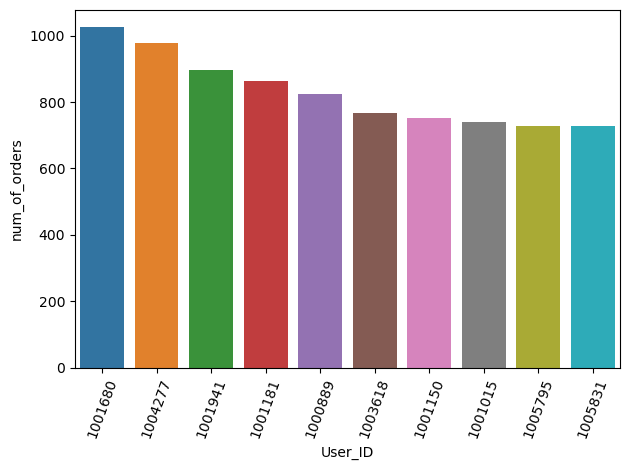

In [23]:
sns.barplot(data=top10_customers_by_numoforders, x='User_ID',y='num_of_orders')
plt.xticks(rotation=70)
plt.tight_layout()

#### Observations-
1. The user id (1001680) which made most number of purchases is not the one with highest purchase amount, though we can correlate that customers who place more orders have higher purchase amount.
2. User 1004277 has purchased the highest in this black Friday sale on Walmart

### Other Univariate categorical variables visual analysis

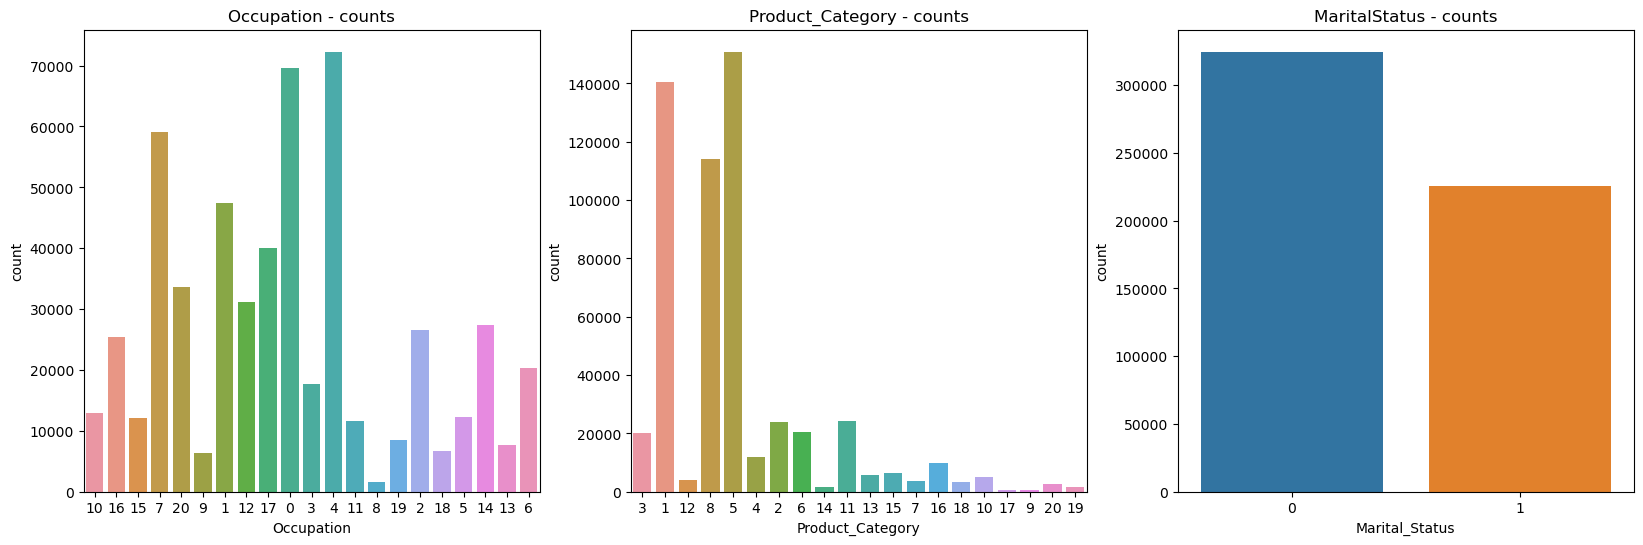

In [24]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
sns.countplot(data=raw_df, x='Occupation', ax=axs[0])
sns.countplot(data=raw_df, x='Product_Category', ax=axs[1])
sns.countplot(data=raw_df, x='Marital_Status', ax=axs[2])

axs[0].set_title("Occupation - counts")
axs[1].set_title("Product_Category - counts")
axs[2].set_title("MaritalStatus - counts")
plt.show()

#### Observation-
1. Most customers have 0,4,7 occupation
2. Product category 5,1,8 are popular product categories among customers
3. More unmarried people buy during black friday sale

### Bivariate Analysis- across Purchase

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

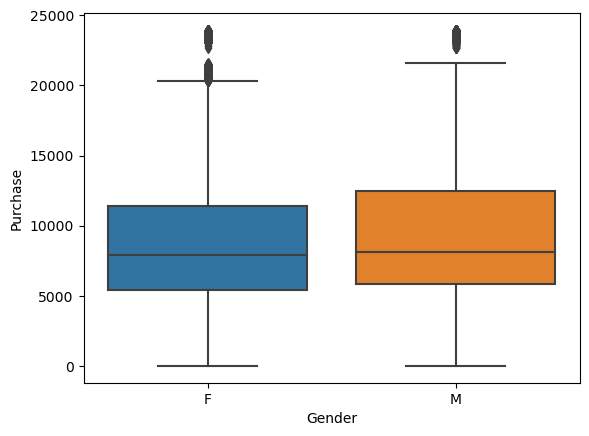

In [25]:
sns.boxplot(x='Gender',y='Purchase', data=raw_df)

- Median purchase is almost same in Male and Female customers, however more outliers are seen for female customers

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

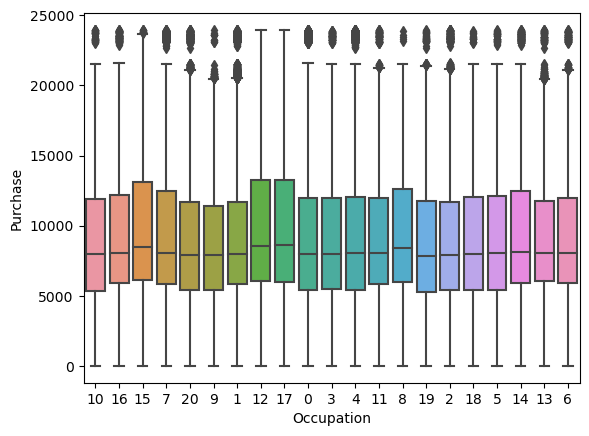

In [26]:
sns.boxplot(x='Occupation',y='Purchase', data=raw_df)

- Median purchase is higher for customer\'s with occupation 12, 17,15

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

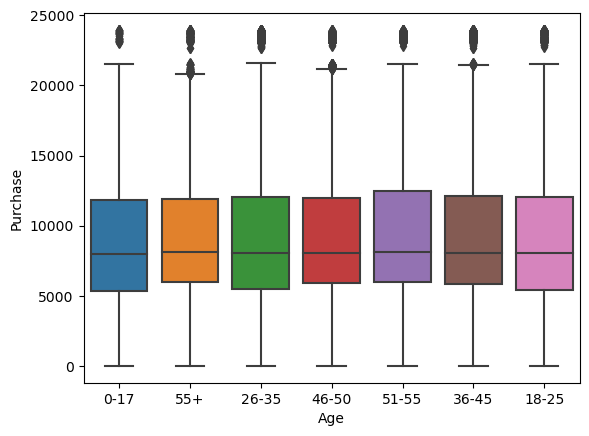

In [27]:
sns.boxplot(x='Age',y='Purchase', data=raw_df)

- Purchase distribution across Age groups also seems to be consistent 

<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

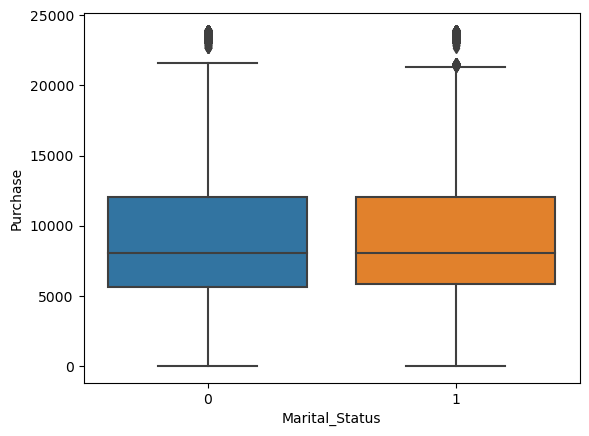

In [28]:
sns.boxplot(x='Marital_Status',y='Purchase', data=raw_df)

- Both marital status have same purchase distribution

#### Multivariate analyis- Gender vs Purchase across different categorical variables

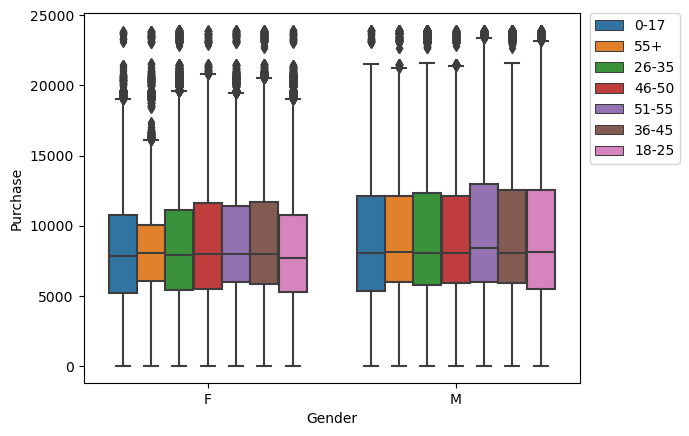

In [29]:
sns.boxplot(x='Gender',y='Purchase',data=raw_df,hue='Age')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

- Female purchase across different age groups have higher purchase amount as outliers, more than male

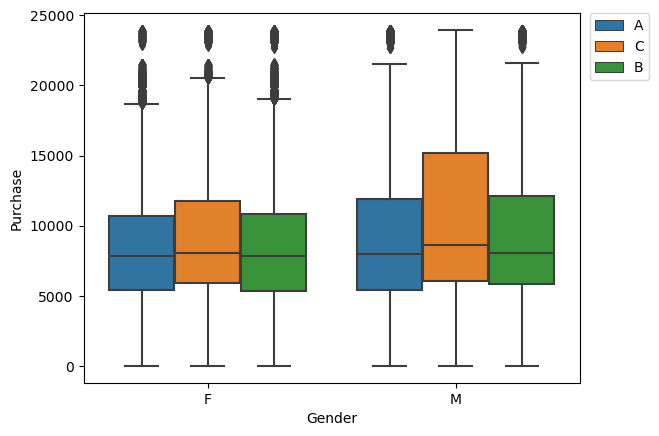

In [30]:
sns.boxplot(x='Gender',y='Purchase',data=raw_df,hue='City_Category')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

- Male customers in C city category have more purchase amount distribution

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


IndexError: list index out of range

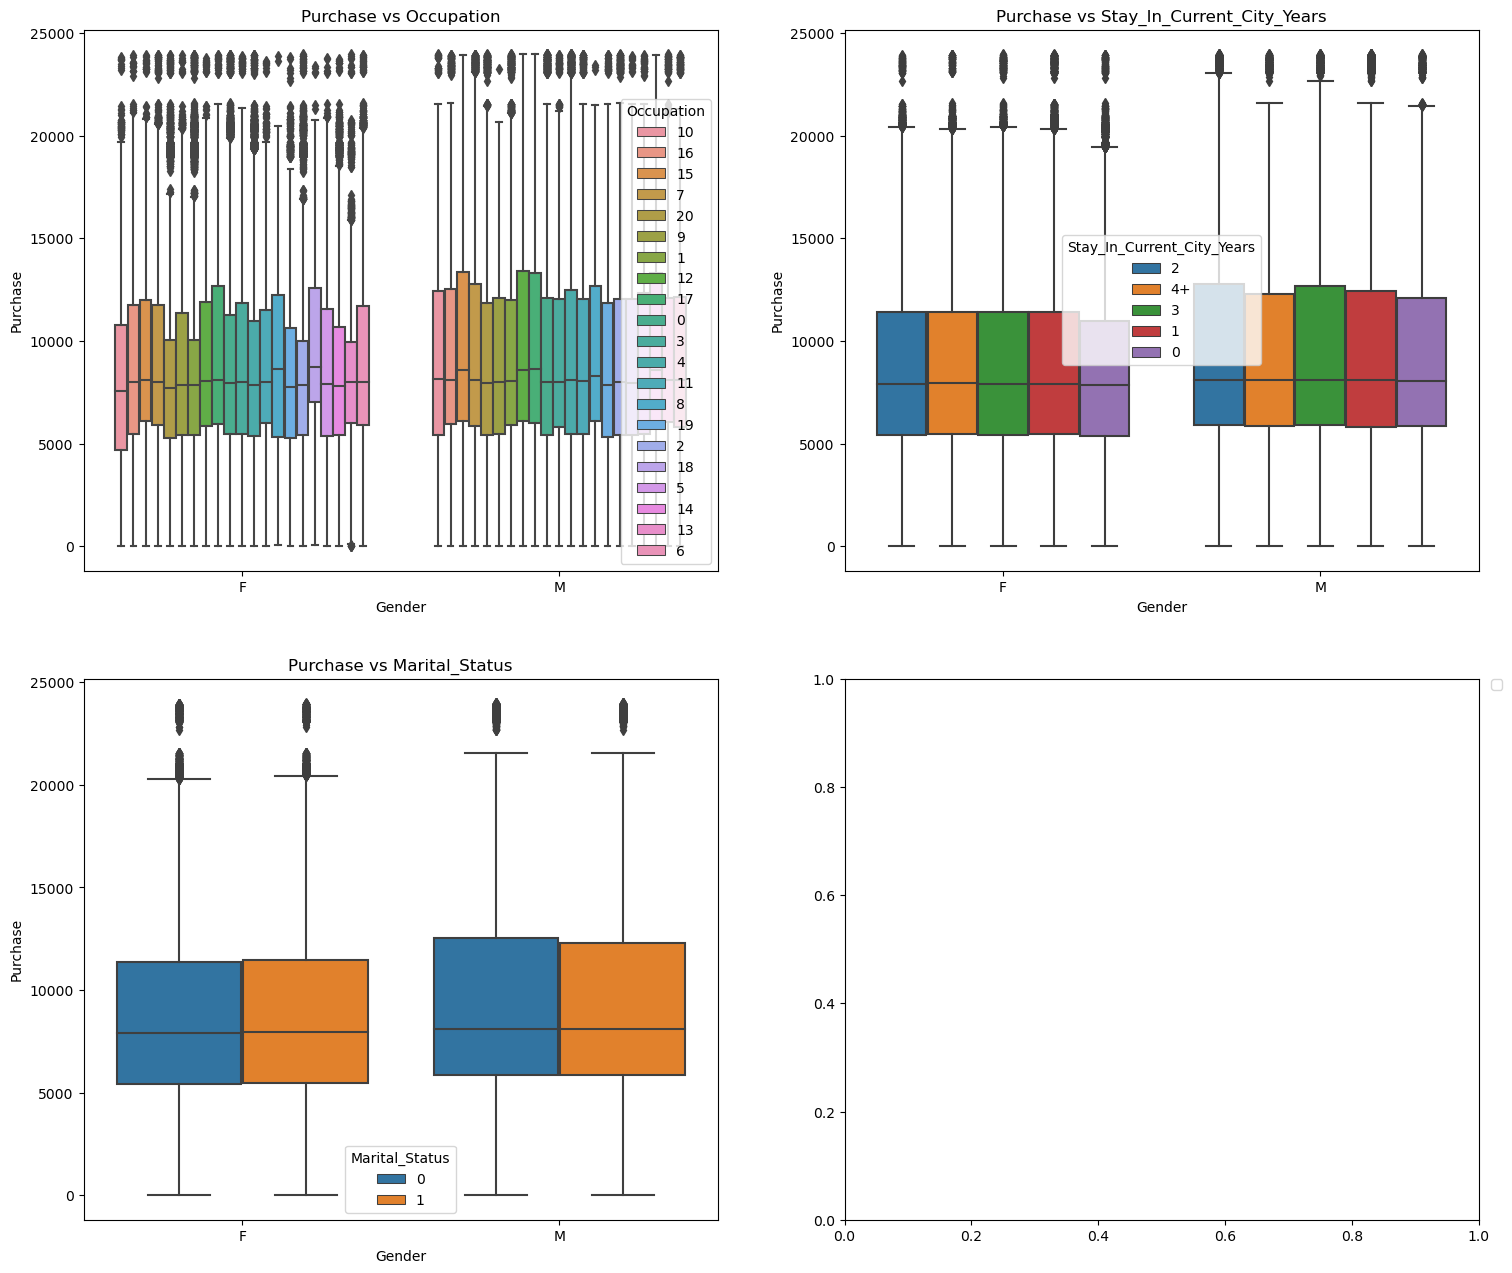

In [31]:
attr = [ 'Occupation', 'Stay_In_Current_City_Years', 'Marital_Status']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))
fig.subplots_adjust(top=1.3)
count = 0
for row in range(2):
    for col in range(2):
        sns.boxplot(data=raw_df, y='Purchase', x='Gender', ax=axs[row, col],hue=attr[count])
        axs[row,col].set_title(f"Purchase vs {attr[count]}")
        count += 1
        plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()


## NOTE FROM TA-
1. For considering sample size- You can take a sample that you think might be good. There's no particular rule. Dont take something too small or the whole dataset.
2. For considering num of repetitions - So a good assumptions, would be to take 2*sample_size

### I. Confidence intervals and distribution of the mean of the expenses by female and male customers 

In [32]:
userlevelgender_purchase = raw_df.groupby(['User_ID', 'Gender'])[['Purchase']].sum()
userlevelgender_purchase = userlevelgender_purchase.reset_index()
userlevelgender_purchase

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


In [33]:
check=userlevelgender_purchase.groupby(['User_ID'],as_index=False)['Gender'].count()
# check
check[check['Gender']>1] ##one user has only one gender(unlike one family using multiple emails)

,User_ID,Gender


In [34]:
userlevelgender_purchase[userlevelgender_purchase['Gender']=='M']['Purchase'].mean()

925344.4023668639

In [35]:
userlevelgender_purchase[userlevelgender_purchase['Gender']=='F']['Purchase'].mean()

712024.3949579832

In [36]:
(userlevelgender_purchase[userlevelgender_purchase['Gender']=='M']['Purchase'].mean()-userlevelgender_purchase[userlevelgender_purchase['Gender']=='F']['Purchase'].mean())*100/userlevelgender_purchase[userlevelgender_purchase['Gender']=='M']['Purchase'].mean()

23.05303915636672

Inference - 
Males average spend is 23% higher than female spend on walmart

In [37]:
male_users=userlevelgender_purchase[userlevelgender_purchase['Gender']=='M']
female_users=userlevelgender_purchase[userlevelgender_purchase['Gender']=='F']

In [38]:
len(male_users)

4225

In [39]:
len(female_users)

1666

In [40]:
genders = ["M", "F"]

sample_size = 1000

num_repetions = 1000
male_means = []
female_means = []

for i in range(num_repetions):
    male_mean = male_users.sample(sample_size, replace=True)['Purchase'].mean()
    female_mean = female_users.sample(sample_size, replace=True)['Purchase'].mean()
    male_means.append(male_mean)
    female_means.append(female_mean)

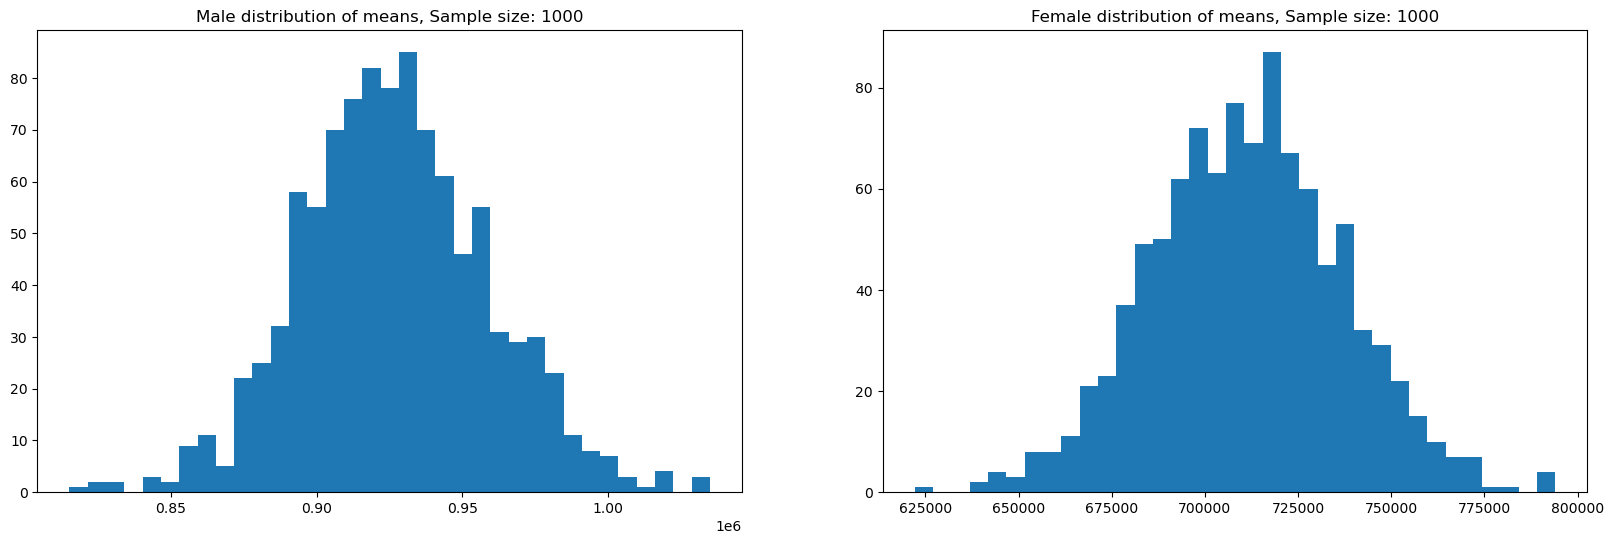

In [41]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(male_means, bins=35)
axis[1].hist(female_means, bins=35)
axis[0].set_title("Male distribution of means, Sample size: "+str(sample_size))
axis[1].set_title("Female distribution of means, Sample size: "+str(sample_size))

plt.show()

In [42]:
print("population purchase mean for male:", userlevelgender_purchase[userlevelgender_purchase['Gender']=='M']['Purchase'].mean())
print("population purchase mean for female:", userlevelgender_purchase[userlevelgender_purchase['Gender']=='F']['Purchase'].mean())

population purchase mean for male: 925344.4023668639
population purchase mean for female: 712024.3949579832


Inference-
- If sample size increases, then sample mean gets closer to population mean
- Sample mean of purchase is close enough to population purchase mean for both genders and sample means are normally distributed as per central limit theorem


In [43]:
from scipy.stats import norm
z90=norm.ppf(1-(1-0.90)/2) ## ask why 1-(1-interval)/2 needs to be done acc to stack overflow- https://stackoverflow.com/questions/20864847/probability-to-z-score-and-vice-versa
z95=norm.ppf(1-(1-0.95)/2) 
z99=norm.ppf(1-(1-0.99)/2)

#### 1. For CI 90%, finding sample mean range

In [44]:
sample_mean_male=np.mean(male_means)
sample_mean_female=np.mean(female_means)

sample_std_male=pd.Series(male_means).std()
sample_std_female=pd.Series(female_means).std()

sample_std_error_male=sample_std_male/np.sqrt(sample_size)
sample_std_error_female=sample_std_female/np.sqrt(sample_size)

Upper_Limit_male=sample_mean_male + z90*sample_std_error_male 
Lower_Limit_male=sample_mean_male - z90*sample_std_error_male

Upper_Limit_female=sample_mean_female + z90*sample_std_error_female
Lower_Limit_female=sample_mean_female - z90*sample_std_error_female

print("Male_CI: ",[Lower_Limit_male,Upper_Limit_male])
print("diff",Upper_Limit_male - Lower_Limit_male)
print("Female_CI: ",[Lower_Limit_female,Upper_Limit_female])

Male_CI:  [925102.85557196, 928472.3521900402]
diff 3369.4966180801857
Female_CI:  [709749.6732482689, 712430.378939731]


Observation:

Now using the Confidence interval at 90%, we can say that:

Average amount spend by male customers lie in the range [923073.7467700097, 929809.1840539904]

Average amount spend by female customers lie in range [710007.0679114508, 715286.247708549]


#### 2. For 95% CI, finding sample mean range

In [64]:
sample_mean_male=np.mean(male_means)
sample_mean_female=np.mean(female_means)

sample_std_male=pd.Series(male_means).std()
sample_std_female=pd.Series(female_means).std()

sample_std_error_male=sample_std_male/np.sqrt(sample_size)
sample_std_error_female=sample_std_female/np.sqrt(sample_size)

Upper_Limit_male=sample_mean_male + z95*sample_std_error_male 
Lower_Limit_male=sample_mean_male - z95*sample_std_error_male

Upper_Limit_female=sample_mean_female + z95*sample_std_error_female
Lower_Limit_female=sample_mean_female - z95*sample_std_error_female

print("Male_CI: ",[Lower_Limit_male,Upper_Limit_male])
print("diff",Upper_Limit_male - Lower_Limit_male)

print("Female_CI: ",[Lower_Limit_female,Upper_Limit_female])

Male_CI:  [924392.806035025, 928244.8064189749]
diff 3852.0003839498386
Female_CI:  [709639.6947404899, 712942.06745951]


#### Observation:

Now using the Confidence interval at 95%, we can say that:

Average amount spend by male customers lie in the range [921441.1525401614, 929184.7454198386]

Average amount spend by female customers lie in range [710942.928740318, 717265.9014596817]


#### 3. For 99% CI, finding sample mean range

In [46]:
z99

2.5758293035489004

In [65]:
sample_mean_male=np.mean(male_means)
sample_mean_female=np.mean(female_means)

sample_std_male=pd.Series(male_means).std()
sample_std_female=pd.Series(female_means).std()

sample_std_error_male=sample_std_male/np.sqrt(sample_size)
sample_std_error_female=sample_std_female/np.sqrt(sample_size)

Upper_Limit_male=sample_mean_male + z99*sample_std_error_male 
Lower_Limit_male=sample_mean_male - z99*sample_std_error_male

Upper_Limit_female=sample_mean_female + z99*sample_std_error_female
Lower_Limit_female=sample_mean_female - z99*sample_std_error_female

print("Male_CI: ",[Lower_Limit_male,Upper_Limit_male])
print("diff",Upper_Limit_male - Lower_Limit_male)

print("Female_CI: ",[Lower_Limit_female,Upper_Limit_female])

Male_CI:  [923787.6129131116, 928849.9995408884]
diff 5062.386627776781
Female_CI:  [709120.8543831855, 713460.9078168145]


### Observation-
If you increase the confidence level (e.g., 95% to 99%) while holding the sample size and variability constant, the confidence interval widens. Conversely, decreasing the confidence level (e.g., 95% to 90%) narrows the range.

### II. Confidence intervals and distribution of the mean of the expenses by Married vs unmarried customers 

In [46]:
raw_df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [47]:
userlevelmaritalstatus_purchase = raw_df.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()
userlevelmaritalstatus_purchase = userlevelmaritalstatus_purchase.reset_index()
userlevelmaritalstatus_purchase

,User_ID,Marital_Status,Purchase
0,1000001,0,334093
1,1000002,0,810472
2,1000003,0,341635
3,1000004,1,206468
4,1000005,1,821001
...,...,...,...
5886,1006036,1,4116058
5887,1006037,0,1119538
5888,1006038,0,90034
5889,1006039,1,590319


In [33]:
check=userlevelmaritalstatus_purchase.groupby(['User_ID'],as_index=False)['Marital_Status'].count()
# check
check[check['Marital_Status']>1] ##one user has only one gender(unlike one family using multiple emails)

,User_ID,Gender


In [48]:
userlevelmaritalstatus_purchase[userlevelmaritalstatus_purchase['Marital_Status']=='0']['Purchase'].mean()

880575.7819724905

In [49]:
userlevelmaritalstatus_purchase[userlevelmaritalstatus_purchase['Marital_Status']=='1']['Purchase'].mean()

843526.7966855295

In [50]:
(userlevelmaritalstatus_purchase[userlevelmaritalstatus_purchase['Marital_Status']=='0']['Purchase'].mean()-userlevelmaritalstatus_purchase[userlevelmaritalstatus_purchase['Marital_Status']=='1']['Purchase'].mean())*100/userlevelmaritalstatus_purchase[userlevelmaritalstatus_purchase['Marital_Status']=='0']['Purchase'].mean()

4.207359099062571

Inference - 
UnMarried average spend is 4.2% higher than Married spend in walmart

In [51]:
unmarried_users=userlevelmaritalstatus_purchase[userlevelmaritalstatus_purchase['Marital_Status']=='0']
married_users=userlevelmaritalstatus_purchase[userlevelmaritalstatus_purchase['Marital_Status']=='1']

In [52]:
len(unmarried_users)

3417

In [53]:
len(married_users)

2474

In [82]:
genders = ["0", "1"]

sample_size = 500

num_repetions = 1000
unmarried_means = []
married_means = []


for i in range(num_repetions):
    unmarried_mean = unmarried_users.sample(sample_size, replace=True)['Purchase'].mean()
    married_mean = married_users.sample(sample_size, replace=True)['Purchase'].mean()
    unmarried_means.append(unmarried_mean)
    married_means.append(married_mean)

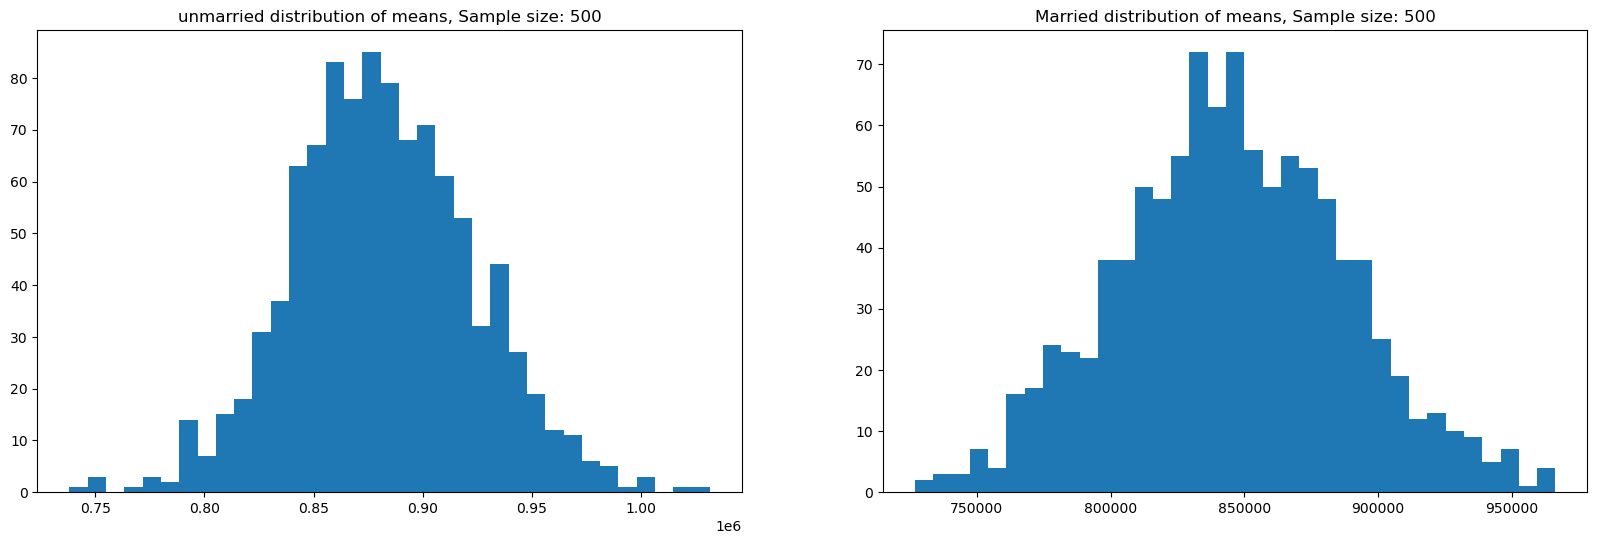

In [87]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(unmarried_means, bins=35)
axis[1].hist(married_means, bins=35)
axis[0].set_title("unmarried distribution of means, Sample size: "+str(sample_size))
axis[1].set_title("Married distribution of means, Sample size: "+str(sample_size))

plt.show()

In [84]:
print("population purchase mean for unmarried:", userlevelmaritalstatus_purchase[userlevelmaritalstatus_purchase['Marital_Status']=='0']['Purchase'].mean())
print("population purchase mean for married:", userlevelmaritalstatus_purchase[userlevelmaritalstatus_purchase['Marital_Status']=='1']['Purchase'].mean())

population purchase mean for unmarried: 880575.7819724905
population purchase mean for married: 843526.7966855295


Inference-
- If sample size increases, then sample mean gets closer to population mean
- Sample mean of purchase is close enough to population purchase mean for both genders and sample means are normally distributed as per central limit theorem


In [85]:
from scipy.stats import norm
z90=norm.ppf(1-(1-0.90)/2) ## ask why 1-(1-interval)/2 needs to be done acc to stack overflow- https://stackoverflow.com/questions/20864847/probability-to-z-score-and-vice-versa
z95=norm.ppf(1-(1-0.95)/2) 
z99=norm.ppf(1-(1-0.99)/2)

#### 1. For CI 90%, finding sample mean range

In [86]:

print("Population avg spend amount for Married: {:.2f}".format(userlevelmaritalstatus_purchase[userlevelmaritalstatus_purchase['Marital_Status']=='1']['Purchase'].mean()))
print("Population avg spend amount for Single: {:.2f}\n".format(userlevelmaritalstatus_purchase[userlevelmaritalstatus_purchase['Marital_Status']=='0']['Purchase'].mean()))

print("Sample avg spend amount for Married: {:.2f}".format(np.mean(married_means)))
print("Sample avg spend amount for Single: {:.2f}\n".format(np.mean(unmarried_means)))

print("Sample std for Married: {:.2f}".format(pd.Series(married_means).std()))
print("Sample std for Single: {:.2f}\n".format(pd.Series(unmarried_means).std()))

print("Sample std error for Married: {:.2f}".format(pd.Series(married_means).std()/np.sqrt(sample_size))) 
print("Sample std error for Single: {:.2f}\n".format(pd.Series(unmarried_means).std()/np.sqrt(sample_size)))

sample_mean_married=np.mean(married_means)
sample_mean_single=np.mean(unmarried_means)

sample_std_married=pd.Series(married_means).std()
sample_std_single=pd.Series(unmarried_means).std()

sample_std_error_married=sample_std_married/np.sqrt(sample_size)
sample_std_error_single=sample_std_single/np.sqrt(sample_size)

Upper_Limit_married= sample_mean_married + z90*sample_std_married 
Lower_Limit_married=sample_mean_married - z90*sample_std_error_married

Upper_Limit_single= sample_mean_single + z90*sample_std_error_single 
Lower_Limit_single=sample_mean_single - z90*sample_std_error_single

print("Married_CI: ",[Lower_Limit_married,Upper_Limit_married])
print("Single_CI: ",[Lower_Limit_single,Upper_Limit_single])


Population avg spend amount for Married: 843526.80
Population avg spend amount for Single: 880575.78

Sample avg spend amount for Married: 845268.95
Sample avg spend amount for Single: 881824.51

Sample std for Married: 42727.81
Sample std for Single: 41739.99

Sample std error for Married: 1910.85
Sample std error for Single: 1866.67

Married_CI:  [842125.8844322852, 915549.9437140241]
Single_CI:  [878754.1136925148, 884894.908507485]


Observation:

Now using the Confidence interval at 90%, we can say that:

Average amount spend by unmarried customers lie in the range [878418.0013056468, 884605.1799343535]

Average amount spend by married customers lie in range [840085.8020649698, 914018.6450689898]

#### 2. For 95% CI, finding sample mean range

In [70]:

print("Population avg spend amount for Married: {:.2f}".format(userlevelmaritalstatus_purchase[userlevelmaritalstatus_purchase['Marital_Status']=='1']['Purchase'].mean()))
print("Population avg spend amount for Single: {:.2f}\n".format(userlevelmaritalstatus_purchase[userlevelmaritalstatus_purchase['Marital_Status']=='0']['Purchase'].mean()))

print("Sample avg spend amount for Married: {:.2f}".format(np.mean(married_means)))
print("Sample avg spend amount for Single: {:.2f}\n".format(np.mean(unmarried_means)))

print("Sample std for Married: {:.2f}".format(pd.Series(married_means).std()))
print("Sample std for Single: {:.2f}\n".format(pd.Series(unmarried_means).std()))

print("Sample std error for Married: {:.2f}".format(pd.Series(married_means).std()/np.sqrt(sample_size))) 
print("Sample std error for Single: {:.2f}\n".format(pd.Series(unmarried_means).std()/np.sqrt(sample_size)))

sample_mean_married=np.mean(married_means)
sample_mean_single=np.mean(unmarried_means)

sample_std_married=pd.Series(married_means).std()
sample_std_single=pd.Series(unmarried_means).std()

sample_std_error_married=sample_std_married/np.sqrt(sample_size)
sample_std_error_single=sample_std_single/np.sqrt(sample_size)

Upper_Limit_married= sample_mean_married + z95*sample_std_married 
Lower_Limit_married=sample_mean_married - z95*sample_std_error_married

Upper_Limit_single= sample_mean_single + z95*sample_std_error_single 
Lower_Limit_single=sample_mean_single - z95*sample_std_error_single

print("Married_CI: ",[Lower_Limit_married,Upper_Limit_married])
print("Single_CI: ",[Lower_Limit_single,Upper_Limit_single])


Population avg spend amount for Married: 843526.80
Population avg spend amount for Single: 880575.78

Sample avg spend amount for Married: 843250.64
Sample avg spend amount for Single: 881511.59

Sample std for Married: 43023.89
Sample std for Single: 42055.27

Sample std error for Married: 1924.09
Sample std error for Single: 1880.77

Married_CI:  [839479.5023663325, 927575.9184778972]
Single_CI:  [877825.3515895229, 885197.8296504774]


#### Observation:

Now using the Confidence interval at 95%, we can say that:

Average amount spend by unmarried customers lie in the range [877825.3515895229, 885197.8296504774]

Average amount spend by married customers lie in range [839479.5023663325, 927575.9184778972]


#### 3. For 99% CI, finding sample mean range

In [46]:
z99

2.5758293035489004

In [71]:
print("Population avg spend amount for Married: {:.2f}".format(userlevelmaritalstatus_purchase[userlevelmaritalstatus_purchase['Marital_Status']=='1']['Purchase'].mean()))
print("Population avg spend amount for Single: {:.2f}\n".format(userlevelmaritalstatus_purchase[userlevelmaritalstatus_purchase['Marital_Status']=='0']['Purchase'].mean()))

print("Sample avg spend amount for Married: {:.2f}".format(np.mean(married_means)))
print("Sample avg spend amount for Single: {:.2f}\n".format(np.mean(unmarried_means)))

print("Sample std for Married: {:.2f}".format(pd.Series(married_means).std()))
print("Sample std for Single: {:.2f}\n".format(pd.Series(unmarried_means).std()))

print("Sample std error for Married: {:.2f}".format(pd.Series(married_means).std()/np.sqrt(sample_size))) 
print("Sample std error for Single: {:.2f}\n".format(pd.Series(unmarried_means).std()/np.sqrt(sample_size)))

sample_mean_married=np.mean(married_means)
sample_mean_single=np.mean(unmarried_means)

sample_std_married=pd.Series(married_means).std()
sample_std_single=pd.Series(unmarried_means).std()

sample_std_error_married=sample_std_married/np.sqrt(sample_size)
sample_std_error_single=sample_std_single/np.sqrt(sample_size)

Upper_Limit_married= sample_mean_married + z99*sample_std_married 
Lower_Limit_married=sample_mean_married - z99*sample_std_error_married

Upper_Limit_single= sample_mean_single + z99*sample_std_error_single 
Lower_Limit_single=sample_mean_single - z99*sample_std_error_single

print("Married_CI: ",[Lower_Limit_married,Upper_Limit_married])
print("Single_CI: ",[Lower_Limit_single,Upper_Limit_single])


Population avg spend amount for Married: 843526.80
Population avg spend amount for Single: 880575.78

Sample avg spend amount for Married: 843250.64
Sample avg spend amount for Single: 881511.59

Sample std for Married: 43023.89
Sample std for Single: 42055.27

Sample std error for Married: 1924.09
Sample std error for Single: 1880.77

Married_CI:  [838294.5239982022, 954072.8403079571]
Single_CI:  [876667.0513379086, 886356.1299020917]


In [ ]:
Observation:

Now using the Confidence interval at 99%, we can say that:

Average amount spend by unmarried customers lie in the range [838294.5239982022, 954072.8403079571]

Average amount spend by married customers lie in range [876667.0513379086, 886356.1299020917]

### Observation-
If you increase the confidence level (e.g., 95% to 99%) while holding the sample size and variability constant, the confidence interval widens. Conversely, decreasing the confidence level (e.g., 95% to 90%) narrows the range.

### III. Confidence intervals and distribution of the mean of the expenses by different Age groups of customers 

In [46]:
raw_df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [88]:
userlevelage_purchase = raw_df.groupby(['User_ID', 'Age'])[['Purchase']].sum()
userlevelage_purchase = userlevelage_purchase.reset_index()
userlevelage_purchase

,User_ID,Age,Purchase
0,1000001,0-17,334093
1,1000002,55+,810472
2,1000003,26-35,341635
3,1000004,46-50,206468
4,1000005,26-35,821001
...,...,...,...
5886,1006036,26-35,4116058
5887,1006037,46-50,1119538
5888,1006038,55+,90034
5889,1006039,46-50,590319


In [90]:
userlevelage_purchase['Age'].value_counts() ##based on num of pop, choose appropriate sample size

26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: Age, dtype: int64

In [89]:
userlevelage_purchase['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

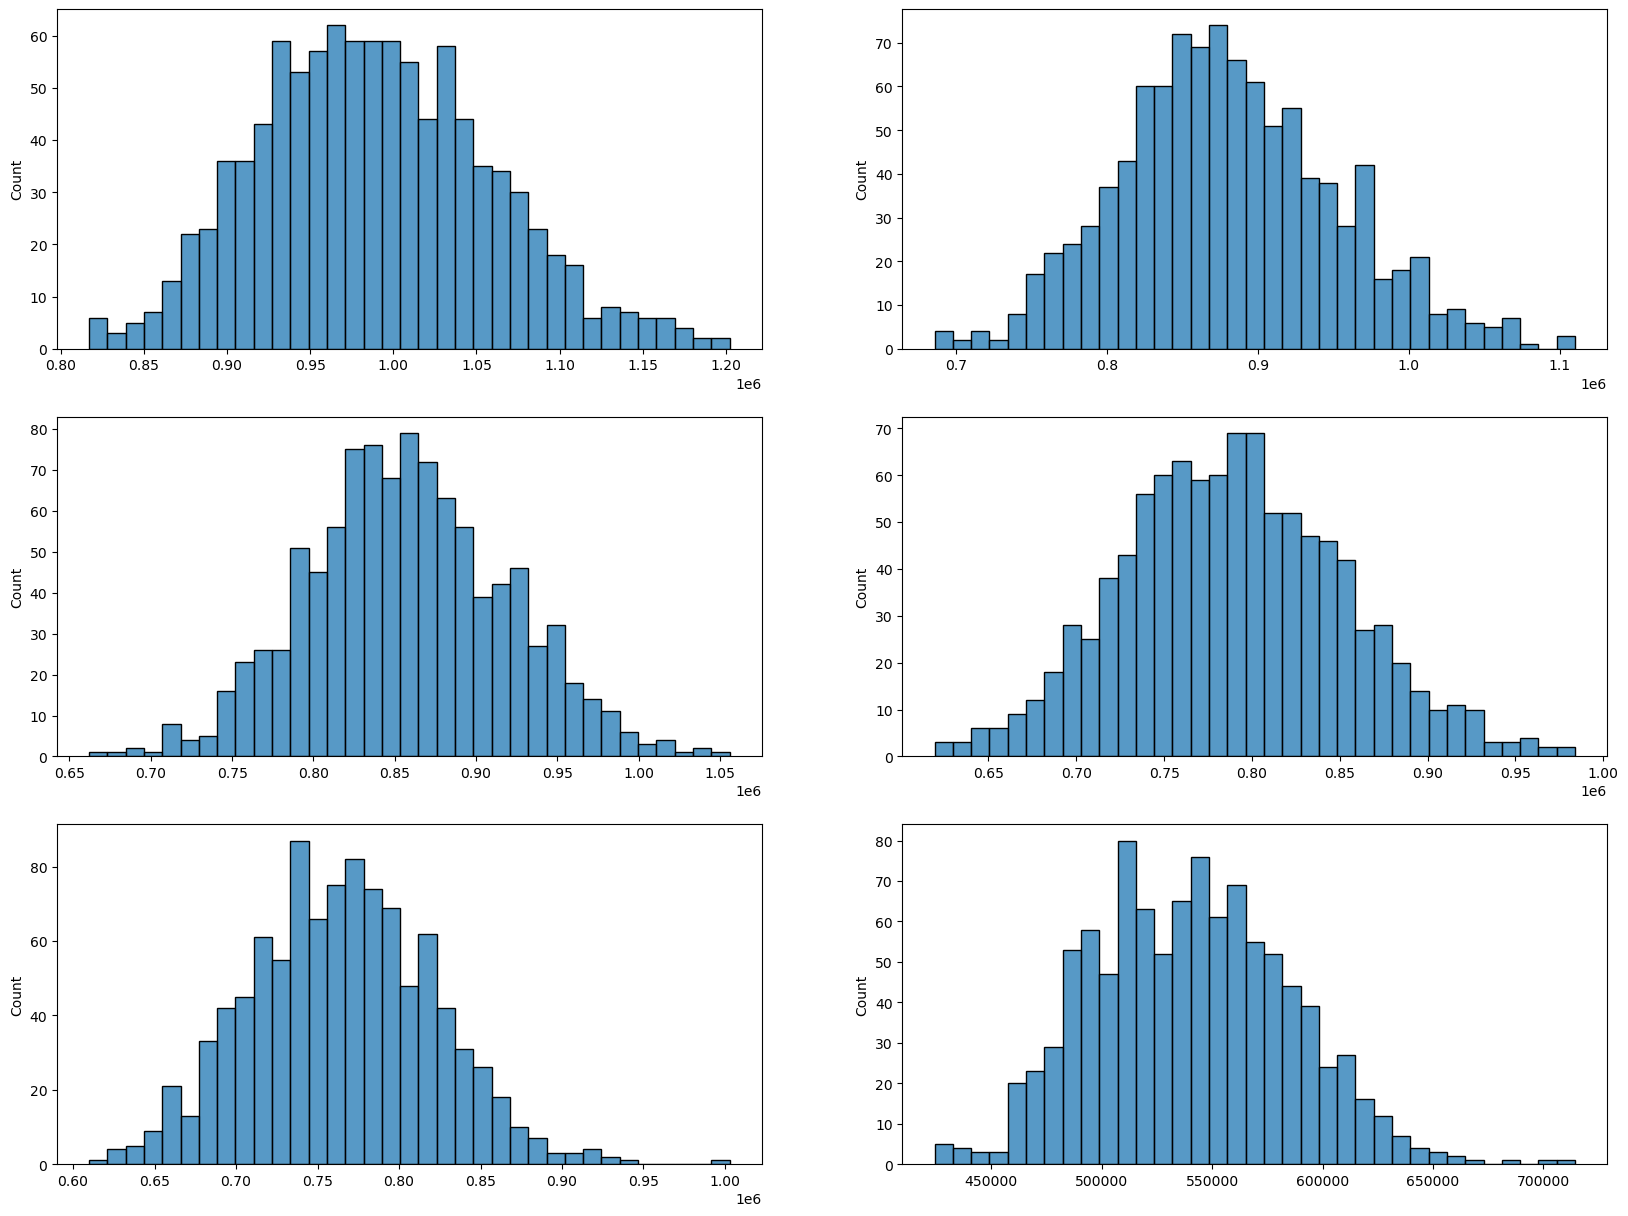

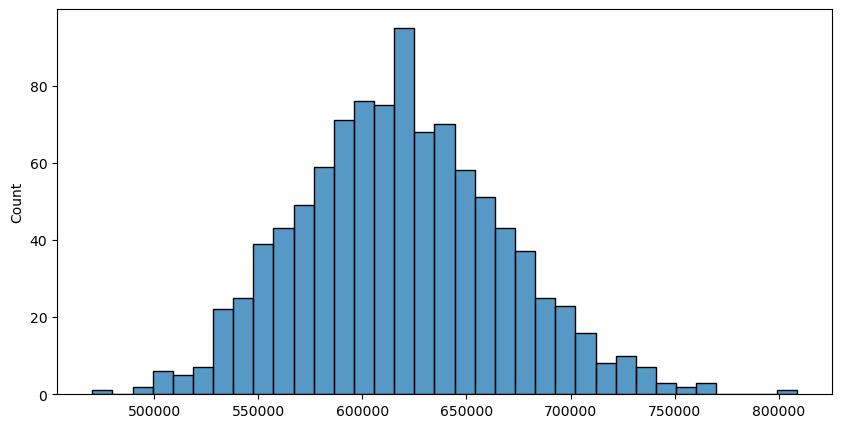

In [92]:
sample_size = 200
num_repitions = 1000

all_sample_means = {}

age_intervals = ['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
for i in age_intervals:
    all_sample_means[i] = []
    
for i in age_intervals:
    for j in range(num_repitions):
        mean = userlevelage_purchase[userlevelage_purchase['Age']==i].sample(sample_size, replace=True)['Purchase'].mean()
        all_sample_means[i].append(mean)
        
        
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

sns.histplot(all_sample_means['26-35'],bins=35,ax=axis[0,0])
sns.histplot(all_sample_means['36-45'],bins=35,ax=axis[0,1])
sns.histplot(all_sample_means['18-25'],bins=35,ax=axis[1,0])
sns.histplot(all_sample_means['46-50'],bins=35,ax=axis[1,1])
sns.histplot(all_sample_means['51-55'],bins=35,ax=axis[2,0])
sns.histplot(all_sample_means['55+'],bins=35,ax=axis[2,1])

plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(all_sample_means['0-17'],bins=35)
plt.show()



Observations:

The means sample seems to be normally distributed for all age groups. Also, we can see the mean of the sample means are closer to the population mean as per central limit theorem. 

#### 1. 90% CI

In [94]:
sample_size = 200
num_repitions = 1000

all_population_means={}
all_sample_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for i in age_intervals:
    all_sample_means[i] = []
    all_population_means[i]=[]
    population_mean=userlevelage_purchase[userlevelage_purchase['Age']==i]['Purchase'].mean()
    all_population_means[i].append(population_mean)
    
print("All age group population mean: \n", all_population_means)
print("\n")
    
for i in age_intervals:
    for j in range(num_repitions):
        mean = userlevelage_purchase[userlevelage_purchase['Age']==i].sample(sample_size, replace=True)['Purchase'].mean()
        all_sample_means[i].append(mean)
        
        
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
    
    new_df = userlevelage_purchase[userlevelage_purchase['Age']==val] 
    
    std_error = z90*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - std_error
    upper_lim = sample_mean + std_error

    print("For age {} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

All age group population mean: 
 {'26-35': [989659.3170969313], '36-45': [879665.7103684661], '18-25': [854863.119738073], '46-50': [792548.7815442561], '51-55': [763200.9230769231], '55+': [539697.2446236559], '0-17': [618867.8119266055]}


For age 26-35 confidence interval of means: (952209.61, 1027109.02)
For age 36-45 confidence interval of means: (832403.10, 926928.32)
For age 18-25 confidence interval of means: (810191.63, 899534.61)
For age 46-50 confidence interval of means: (726214.90, 858882.66)
For age 51-55 confidence interval of means: (703777.65, 822624.20)
For age 55+ confidence interval of means: (487037.60, 592356.89)
For age 0-17 confidence interval of means: (542327.27, 695408.35)


#### 2. 95% CI

In [95]:
sample_size = 200
num_repitions = 1000

all_population_means={}
all_sample_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for i in age_intervals:
    all_sample_means[i] = []
    all_population_means[i]=[]
    population_mean=userlevelage_purchase[userlevelage_purchase['Age']==i]['Purchase'].mean()
    all_population_means[i].append(population_mean)
    
print("All age group population mean: \n", all_population_means)
print("\n")
    
for i in age_intervals:
    for j in range(num_repitions):
        mean = userlevelage_purchase[userlevelage_purchase['Age']==i].sample(sample_size, replace=True)['Purchase'].mean()
        all_sample_means[i].append(mean)
        
        
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
    
    new_df = userlevelage_purchase[userlevelage_purchase['Age']==val] 
    
    std_error = z95*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - std_error
    upper_lim = sample_mean + std_error

    print("For age {} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

All age group population mean: 
 {'26-35': [989659.3170969313], '36-45': [879665.7103684661], '18-25': [854863.119738073], '46-50': [792548.7815442561], '51-55': [763200.9230769231], '55+': [539697.2446236559], '0-17': [618867.8119266055]}


For age 26-35 confidence interval of means: (945035.24, 1034283.39)
For age 36-45 confidence interval of means: (823348.84, 935982.58)
For age 18-25 confidence interval of means: (801633.75, 908092.49)
For age 46-50 confidence interval of means: (713507.09, 871590.48)
For age 51-55 confidence interval of means: (692393.73, 834008.12)
For age 55+ confidence interval of means: (476949.41, 602445.08)
For age 0-17 confidence interval of means: (527664.13, 710071.49)


#### 3. 99% CI

In [96]:
sample_size = 200
num_repitions = 1000

all_population_means={}
all_sample_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for i in age_intervals:
    all_sample_means[i] = []
    all_population_means[i]=[]
    population_mean=userlevelage_purchase[userlevelage_purchase['Age']==i]['Purchase'].mean()
    all_population_means[i].append(population_mean)
    
print("All age group population mean: \n", all_population_means)
print("\n")
    
for i in age_intervals:
    for j in range(num_repitions):
        mean = userlevelage_purchase[userlevelage_purchase['Age']==i].sample(sample_size, replace=True)['Purchase'].mean()
        all_sample_means[i].append(mean)
        
        
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
    
    new_df = userlevelage_purchase[userlevelage_purchase['Age']==val] 
    
    std_error = z99*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - std_error
    upper_lim = sample_mean + std_error

    print("For age {} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

All age group population mean: 
 {'26-35': [989659.3170969313], '36-45': [879665.7103684661], '18-25': [854863.119738073], '46-50': [792548.7815442561], '51-55': [763200.9230769231], '55+': [539697.2446236559], '0-17': [618867.8119266055]}


For age 26-35 confidence interval of means: (931013.34, 1048305.29)
For age 36-45 confidence interval of means: (805652.79, 953678.63)
For age 18-25 confidence interval of means: (784907.87, 924818.37)
For age 46-50 confidence interval of means: (688670.39, 896427.18)
For age 51-55 confidence interval of means: (670144.49, 856257.35)
For age 55+ confidence interval of means: (457232.61, 622161.87)
For age 0-17 confidence interval of means: (499005.86, 738729.76)


#### Insights and recommendations-
1.  Out of 550068 data points, 414259 transactions(75%) are made by Male. Also Men\'s average spend is more than women so business should focus on selling more products for women and targetting women to spend more
2. Top product ID bought is 'P00265242' so business could keep this in stock more as there is lot of demand for this product 
3. Product category 5,1,8 are popular product categories among customers and in demand. Walmart should keep these in sale and try selling these even more
4. Most customers are in the age bracket of 26-35 and most are unmarried
5. The most frequent buyer/customer is with user id- 1001680 and we should incentivize the top10 customers interms of most amount spent and also most number of orders made to give more discount to continue shopping
6. More unmarried people buy during black friday sale and business should focus on single people demographic when marketing
7. Though City category 'C' has highest number of customers(53%) living there, while purchase history shows many live in city 'B','C'. The reason could be that many in the age group of 26-35 purchase a lot who in turn are living in B, C city categories. So business should focus on acquiring customers from this age group
8. People who are staying in city for an year have contributed to 35% of the total purchase amount. Company can focus on such customer base
9.From the purchase boxplot we observe the highest frequency of purchase order between 5k and 10k, company can focus more on these mid range products to increase the sales
10. Are women spending more money per transaction than men? Why or Why not?
No. CI's of male and female do not overlap and upper limits of female purchase CI are lesser than lower limits of male purchase CI. This proves that men usually spend more thanwomen (NOTE: as per data 77% contibutions are from men and only 23% purchases are from women)

